https://phys.libretexts.org/@go/page/9568
or
https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_(Cline)/02%3A_Review_of_Newtonian_Mechanics/2.04%3A_First-order_Integrals_in_Newtonian_mechanics

General Introduction to Integral:
https://encyclopediaofmath.org/wiki/Integral


**2.4: First-order Integrals in Newtonian mechanics**
 
 A fundamental goal of mechanics is to determine the equations of motion for an n−body system, where the force $\mathbf{F}_i$ acts on the individual mass $m_i$ where $1 ≤ i ≤ n $. 
 
 Newton’s second-order equation of motion, 
 $\begin{align}
\mathbf{F}=\frac{d\mathbf{p}}{dt}=m \frac{d^2\mathbf{r}}{dt^2} = m \ddot{\mathbf{r}}  && (2.2.6)
\end{align} $   

must be solved to calculate instantaneous spatial locations, velocities, and accelerations for each mass $m_i$ of an n-body system. Both $\mathbf{F} $ and $\ddot{\mathbf{r}}_i$ are vectors each having three orthogonal components. 

The solution of equation (2.2.6) involves integrating second-order equations of motion subject to a set of initial conditions. Although this task appears simple in principle, it can be exceedingly complicated for many- body systems. Fortunately, solution of the motion often can be simplified by exploiting three first-order integrals of Newton’s equations of motion, that relate directly to conservation of either the linear momentum, angular momentum, or energy of the system. In addition, for the special case of these three first-order integrals, the internal motion of any many-body system can be factored out by a simple transformations into the center of mass of the system. As a consequence, the following three first-order integrals are exploited extensively in classical mechanics.

**Linear Momentum**

Newton’s Laws can be written as the differential and integral forms of the first-order time integral which equals the change in linear momentum.

$\mathbf{F}_i = \frac{d\mathbf{p}_i}{dt} $

$
\begin{align}
\int_1 ^2 {\mathbf{F}_i dt} = \int_1^2{\frac{d\mathbf{p}_i}{dt} dt} = (\mathbf{p}_2 - \mathbf{p}_1)_i  &&  (2.4.1)
\end{align}
$


This allows Newton's law of motion to be expressed directly in terms o the linear momentum $\mathbf{p}_i = m_i \dot{r}_i $ of each of the $1 < i < n $ bodies in the system. This first-order time integral features prominently in classical mechanics since it connects to the important concept of linear momentum $\mathbf{p} $. This first-order time integral gives that the total linear momentum is a constant of motion when the sum of the external forces is zero.

Let's put 2.3.1 into code by copying the sets of code from Gelileo_Transform sageMath notebook as below:

In [43]:
ax = 2;
ay = 1;
az = 3;
a1=3
a2 =4
a3=2
var('t')
var('t_prime')
#case 1:r.diff(t, 2) would be zero, so the force would be zero
#analysis:
#    this seems that the velocity is going linear in all dimension, which would 
#mean some type of equilibrium, and the resulting force is zero
#r=vector((ax*t, ay*t, az*t  ))
#case 2: r.diff(t, 2) not equal to zero, so the resulting force > 0
#analysis:
#    this seems to be the average case when the force acting on the moving
#    object results in one direction having a push, so the force is not zero
r=vector((ax*t^2, ay*t, az  ))
r
#r(t=10)
#check if the second derivative is  zero, which results in 0 force
#r.diff(t, 2) == 0

m = 10 #this is just an arbitrary value of the mass
#what is the unit of momentum?
#it seems to be mass * distance / unit time
#how to make a vector value function out of this?
#fr = vector(r.diff(t)*t)
#P = m * fr
#r=vector((ax*t, ay*t, az*t  ))
Pi = m * r.diff(t, 1)
Pi

(40*t, 10, 0)

Now we linear momentum as a Vector Valued Function, we can go ahead and code equation
2.4.1 as below:

In [41]:
#var('i')
#technically, i should be an index for an array or list structure holding 
#values of Fi, we probably don't need to worry about here just yet, not sure
#instead we just call the i as part of the symbol
Fi = m * r.diff(t, 2)
#Pi.diff(t, 1)
Fi


(40, 0, 0)

Now the fun part of this chapter, the integral, how we code integral in sageMath?
standard way as:

In [42]:
integral(Fi, (t, 1, 4))


(120, 0, 0)

But this looks like the same value as the force, is it because we are performing integral over a vector?

Let's try making the force a vector valued function so that we could do calculus on it
by:


In [23]:
F(t)=Fi * t
integral(F, (t, 1, 4))

(300, 0, 0)

Now which one is correct? the 40 or the 60
According to the text, it should equal to
$$
\begin{align}
\int_1 ^2 {\mathbf{F}_i dt} = \int_1^2{\frac{d\mathbf{p}_i}{dt} dt} = (\mathbf{p}_2 - \mathbf{p}_1)_i  &&  (2.4.1)
\end{align}
$$

So let's try coding the momentum formula:


In [26]:
Pi(t=4) #(160, 10, 0)
#Pi(t=1) #(40, 10, 0)
Pi(t=4) - Pi(t=1)

(120, 0, 0)

well, the answer is the 40!! Hmm, what does it mean?

So according to https://encyclopediaofmath.org/wiki/Integral

"The notion of the definite integral is introduced either as a limit of integral sums (see Cauchy integral; Riemann integral; Lebesgue integral; Stieltjes integral) or, in the case when the given function f is defined on some interval [a,b] and has a primitive F
 on this interval, as the difference between the values at the end points, that is, as F(b)−F(a). 

The definite integral of f
 on [a,b]
 is denoted by $$ \int \limits^b_a f(x) dx $$
. The definition of the integral as a limit of integral sums for the case of continuous functions was stated by A.L. Cauchy in 1823. The case of arbitrary functions was studied by B. Riemann (1853). A substantial advance in the theory of definite integrals was made by G. Darboux (1879), who introduced the notion of upper and lower Riemann sums (see Darboux sum). A necessary and sufficient condition for the Riemann integrability of discontinuous functions was established in final form in 1902 by H. Lebesgue.

There is the following relationship between the definitions of the definite integral of a continuous function f on a closed interval [a,b] and the indefinite integral (or primitive) of this function: 
 
 1) if F is any primitive of f, then the following Newton–Leibniz formula holds:
$$\int \limits_a^b f(x) \, dx = F(b) - F(a) $$

 2) for any x in the interval [a,b]
, the indefinite integral of the continuous function f
 can be written in the form
 
 $$\int f(x)\, dx=\int\limits_a^x f(t)\, dt+C $$
 
 where C is an arbitrary constant. In particular, the definite integral with variable upper limit,

$$ F(x) = \int \limits_a^x f(t)\, dt \label{1}$$

is a primitive of f."

One can see that
$$
\begin{align}
\int_1 ^2 {\mathbf{F}_i dt} = \int_1^2{\frac{d\mathbf{p}_i}{dt} dt} = (\mathbf{p}_2 - \mathbf{p}_1)_i  &&  (2.4.1)
\end{align}
$$
is correct application of part 1) of the above definition of integral formulas, in that momentum function P is the so called primitive function F(x), while the force F in the 2.4.2 is the given function f(x) in the Newton–Leibniz formula.

Still the question is that integral of a vector, is it going to be correct? 

We would like to prove this formula 1) for vectors.

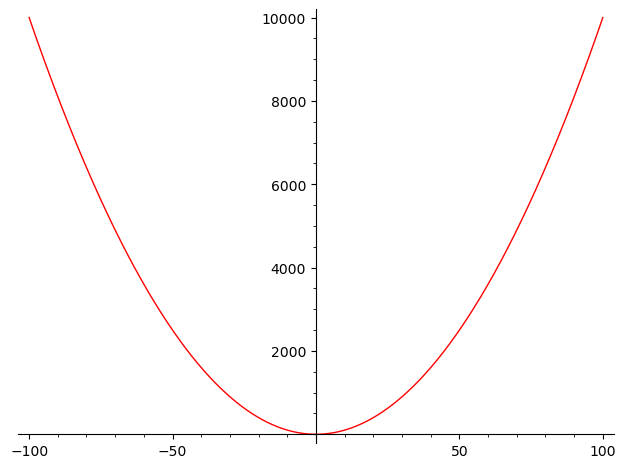

In [44]:
#the following is just to get a sense of what these functions look like graphically
f(t)=t^2
f2(t) =t^3
fplot=plot(f, (t, -100, 100), color="red")
f2plot=plot(f2, (t, -100, 100) )
g = fplot 
#+ fplot
g.show()